<a href="https://colab.research.google.com/github/T-K-Nguyen/Dental-Clinic-System-Performance-Evaluation/blob/main/HK151_SPE_Obsidian_Serpent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


----

<center>Assignment 1</center>
<center>The Queuing Systems-based</center>
<center>Performance Evaluation Project</center>
<center>Course: System Performance Evaluation</center>
    
----



# **1. Team work declaration**

## Team
|Student  |Id |
|----|---------|
|Trương Đình Phúc | 2212657 |
|Phan Trần Nguyên Phúc| 2212643|
|Nguyễn Hoàng Thông | 2213332|
|Tô Minh Khải | 2211556|
|Võ Thành Nhân | 2111914|
|Bùi Đăng Khoa | 2211581|
|Nguyễn Kim Thuận | 2213357|
|Cao Thanh Tiến | 2213446|

## Workmap declaration

| Last name | Student ID | Design Role | Dev Role | Eval Role | Report Role | Ass1 work description (details in text)  | Rating | week 2 outcome | week 3 outcome | week 4 outcome  |
|-----------|------------|-------------|----------|-----------|-------------|------------------------------------------|-----------------|----------------|----------------|-----------------|
| Trương Đình Phúc | 2212657 | yes | no   | no    | yes/no      |                                          | A/B/C           |                |                |                 |
| Phan Trần Nguyên Phúc | 2212643 | yes      | no   | no    | yes/no      |                                          | A/B/C           |                |                |                 |
| Nguyễn Hoàng Thông | 2213332 | no      | no   | yes    | yes/no      |                                          | A/B/C           |                |                |                 |
| Tô Minh Khải | 2211556 | no      | no   | yes    | yes/no      |                                          | A/B/C           |                |                |                 |
| Võ Thành Nhân | 2111914 | no      | yes   | no    | yes/no      |                                          | A/B/C           |                |                |                 |
| Bùi Đăng Khoa  | 2211581 | no      | no   | yes    | yes/no      |                                          | A/B/C           |                |                |                 |
| Nguyễn Kim Thuận  | 2213357 | no      | yes  | no    | yes/no      |                                          | A/B/C           |                |                |                 |
| Cao Thanh Tiến | 2213446 | yes      | no   | no    | yes/no      |                                          | A/B/C           |                |                |                 |

# **2. System design**

## System Performance Steps

### 1. Define Goal and System
**Goal:** Tìm số lượng nhân viên (server) hợp lí cho từng Khu vực trong phòng khám để đảm bảo hệ thống phòng khám hoạt động hiệu quả, giảm thời gian chờ đợi của bệnh nhân và tránh hiện tượng tắc nghẽn tại một khu vực (node) trong hệ thống phòng khám.

**System boundaries:**
  - Đối tượng phục vụ: Bệnh nhân đến khám và sử dụng dịch vụ nha khoa.
  - Các điểm phục vụ chính (nodes)
    - Quầy tiếp nhận (Reception Desk): Tiếp nhận bệnh nhân, tạo hồ sơ khám.
    - Quầy thu ngân (Cashier Desk): Thanh toán chi phí dịch vụ cho bệnh nhân.
    - Phòng khám nha sĩ (Dentist): Bác sĩ nha khoa thực hiện việc khám và điều trị.
    - Quầy thuốc (Pharmacy): Cấp thuốc cho bệnh nhân.


### 2. Service and Outcomes
**Services:**
  - Tiếp nhận bệnh nhân tại quầy lễ tân (Reception).
  - Thanh toán chi phí dịch vụ tại quầy thu ngân (Cashier).
  - Khám và điều trị răng miệng tại phòng bác sĩ (Dentist).
  - Cấp thuốc và tư vấn sử dụng tại quầy thuốc (Pharmacy).

**Outcomes:**

  - Thời gian chờ trung bình E[w] của bệnh nhân ở từng khu vực (node).
  - Tổng thời gian bệnh nhân ở trong hệ thống E[r] (System Response Time).
  - Mức độ sử dụng (Utilization) của từng khu vực (node).
  - Số lượng bệnh nhân được phục vụ trong một đơn vị thời gian (Throughput).
### 3. Select Metrics
Các chỉ số được sử dụng trong quá trình phân tích hiệu năng hệ thống bao gồm:
  - Average Waiting Time (E[w]): Thời gian chờ trung bình của bệnh nhân tại mỗi khu vực (node).
  - Average System Time (E[r]): Tổng thời gian bệnh nhân ở phòng khám.
  - System Throughput (X): Số lượng bệnh nhân được phục vụ trong một giờ.
  - Utilization (ρ): Tỷ lệ phần trăm thời gian mà mỗi quầy (node) đang bận phục vụ -> giúp xác định vị trí bị nghẽn.
  - Average number of patients in queue (E[$n_r$]): số lượng trung bình khách hàng trong hàng đợi, phản ánh tải làm việc.
### 4. List System Parameters
**System parameters**
  - Số lượng server (c) tại mỗi khu vực (node): Số quần Lễ tân, số nhân viên ở Cashier Desk, số nha sĩ ở Dentist, số nhân viên ở Pharmacy.
  - Service rate ($\mu$) trung bình tại mỗi khu vực (node)
  - Service discipline: chính sách xử lý hàng đợi bệnh nhân (FCFS)
  - Routing probabilites ($p_{ij}$): xác suất chuyển từ node i sang node j.
  - Buffer Capacity (K): mỗi khu vực (node) trong phòng khám có giới hạn chỗ ngồi.

**Workload parameters**

  - Tần suất đến phòng khám của bệnh nhân
  - Tỷ lệ bệnh nhân rời đi khi phải chờ quá lâu.
  - Thời gian di chuyển giữa các khu vực của bệnh nhân
  - Thời gian chờ trung bình của bệnh nhân
### 5. List Factors to Study
**Nghiên cứu và đánh giá các yếu tố sau:**
- Ảnh hưởng của số lượng nhân viên (server) tại từng khu vực (node) đến thời gian chờ và thông lượng.
- Ảnh hưởng của tốc độ đến bệnh nhân (λ) trong các khung giờ cao điểm.
- Mức độ cân bằng tải giữa các khu vực (node).
- Ảnh hưởng từ xác suất chuyển tiếp giữa các khu vực (node)

### 6. Evaluation Technique
Do hệ thống phòng khám gồm nhiều node tương tác (Reception Desk, Cashier Desk, Dentist, Pharmacy) và có tính ngẫu nhiên cao trong arrival/service time, nên nhóm quyết định sẽ sử dụng kỹ thuật:
- **Analytical modeling**: Nhóm sử dụng Jackson's Queuing Network để thiết kế hệ thống, phân tích lý thuyết và ước lượng các chỉ số trung bình ($ρ, E[w], E[n_r]$)
- **Simulation**: Nhóm sử dụng SimPy để mô phỏng hoạt động của hệ thống và đánh giá hiệu suất vận hành của hệ thống trong một số trường hợp đã được liệt kê sẵn. So sánh các chỉ số về thời gian, hiệu quả sử dụng, thông lượng đã được tính toán từ trước. Tìm ra phương án tối ưu hơn cho hệ thống.
### 7. Select Workload
Để mô phỏng thực tế hoạt động của phòng khám nha khoa, **workload** được mô tả bằng các đặc trưng trong Bảng dưới đây.  
Các giá trị được lựa chọn dựa trên giả định hợp lý cho một ca làm việc tiêu chuẩn kéo dài 8 giờ, với số lượng bệnh nhân thay đổi theo giờ cao điểm.  
Những đặc trưng này phản ánh đặc tính hoạt động thực tế của các khu vực chính (Reception, Cashier, Dentist, Pharmacy) trong mô hình mạng hàng đợi Jackson.


| **Đặc trưng** | **Giá trị giả định (cho mô phỏng ban đầu)** | **Ghi chú** |
|----------------|---------------------------------------------|-------------|
| **Arrival rate (λ)** | 15–30 bệnh nhân/giờ | Thay đổi theo giờ cao điểm. |
| **Service rate (μ₁–μ₄)** | Reception: 30, Cashier: 30, Dentist: 5, Pharmacy: 15 (bệnh nhân/giờ) | Tùy từng khu vực. |
| **Routing probabilities** | Reception→Cashier: 1.0, Cashier→Dentist: 1.0, Dentist→Pharmacy: 0.7, Dentist→Exit: 0.3, Pharmacy→Exit: 1.0 | Dựa trên quy trình khám thực tế. |
| **Service discipline** | FCFS (First-Come, First-Served) | Phù hợp với hệ thống khám bệnh. |
| **Simulation duration** | 1 ca làm việc = 8 giờ | Đủ dài để ổn định trạng thái (steady state). |


<center> Bảng các thông số mô tả workload của hệ thống phòng khám nha khoa</center>


## System Component/Module description
dental_clinic_class_diagram.svg
Hệ thống được tổ chức theo kiến trúc mô phỏng sự kiện rời rạc với các mô-đun tách biệt rõ ràng, giúp dễ bảo trì và mở rộng:

### 1) Patient
- Vai trò: Đại diện cho một bệnh nhân đi qua các trạm trong hệ thống.
- Thuộc tính chính:
  - `id`: mã định danh bệnh nhân.
  - `arrival_time`: thời điểm vào hệ thống.
  - `path`: danh sách các trạm đã đi qua.
  - `wait_times`, `service_times`: thời gian chờ và phục vụ theo từng trạm.
  - `start_time`, `end_time`: mốc thời gian bắt đầu/kết thúc tại từng trạm.
  - `exit_time`: thời điểm rời hệ thống.
  - `visited`: tập các trạm đã ghé để tránh vòng lặp định tuyến.

### 2) Queue
- Vai trò: Mô hình hóa hàng đợi và phục vụ tại một trạm theo cơ chế M/M/c/K.
- Tham số:
  - `c`: số server (năng lực phục vụ song song).
  - `mu`: tốc độ phục vụ (bệnh nhân/phút).
  - `K`: dung lượng hàng đợi tối đa (có thể None → vô hạn).
- Hành vi:
  - Kiểm tra blocking (đầy hệ thống: `servers.count + len(servers.queue) >= c + K`).
  - Ghi nhận arrival, thời gian chờ, thời gian phục vụ, departure.
  - Phân phối thời gian phục vụ theo exponential với tham số `mu`.

### 3) Node
- Vai trò: "Vỏ bọc" của `Queue` cho từng trạm (Reception, Cashier, Dentist, Pharmacy).
- Hành vi:
  - Nhận bệnh nhân vào trạm và chuyển vào hàng đợi.
  - Sau khi phục vụ xong, giao cho bộ định tuyến quyết định trạm kế tiếp.

### 4) NodeManager
- Vai trò: Điều phối định tuyến giữa các trạm theo ma trận routing.
- Thành phần:
  - `nodes`: từ điển trạm đang có trong hệ thống.
  - `routing_matrix`: ma trận xác suất chuyển tiếp (weighted random choice).
- Hành vi:
  - `get_next_node(current_node_id, patient)`: chọn trạm kế tiếp theo xác suất; nếu trạm đã ghé (và không phải `exit`) thì cho ra khỏi hệ thống để tránh vòng lặp.

### 5) Statistics
- Vai trò: Bộ ghi nhận và tổng hợp số liệu hiệu năng.
- Dữ liệu thu thập:
  - `wait_times`, `service_times`: danh sách theo trạm.
  - `arrival_count`, `departure_count`, `loss_count`: đếm sự kiện theo trạm.
  - `system_times`: thời gian hệ thống của từng bệnh nhân.
- Báo cáo:
  - `summary_report()`: trả về các chỉ số như thời gian chờ trung bình, thông lượng, loss rate, thời gian hệ thống trung bình.

### 6) DentalClinicSystem
- Vai trò: Điều phối toàn cục, khởi tạo môi trường `simpy`, cấu hình trạm, chạy mô phỏng.
- Cấu hình mặc định:
  - Reception: `c=2`, `mu=30/60`, `K=10`
  - Cashier: `c=2`, `mu=30/60`, `K=10`
  - Dentist: `c=4`, `mu=5/60`, `K=15`
  - Pharmacy: `c=2`, `mu=15/60`, `K=8`
- Routing mặc định:
  - Reception → Cashier (1.0)
  - Cashier → Dentist (1.0)
  - Dentist → Exit (0.3), Pharmacy (0.7)
  - Pharmacy → Exit (1.0)
- Luồng chính:
  - `patient_generator()`: sinh bệnh nhân theo Poisson (inter-arrival ~ Exp(λ/60)).
  - `patient_journey(patient)`: bệnh nhân đi từ Reception qua các trạm theo routing cho đến Exit; ghi nhận thời gian hệ thống.
  - `run()`: thực thi mô phỏng đến hết thời gian ca (`sim_hours * 60`) và trả về `summary_report()`.

### 7) Kết nối và mở rộng
- Tách mô-đun giúp dễ dàng:
  - Thay đổi cấu hình năng lực (c, mu, K) cho từng trạm.
  - Chỉnh sửa ma trận routing theo kịch bản thực tế.
  - Mở rộng `Statistics` cho báo cáo theo lát thời gian (mỗi 2 giờ) phục vụ mô phỏng workload biến thiên intra‑day.
- Đề xuất sắp tới (Nhóm 3): áp dụng **piecewise workload** (4 lát × 2 giờ) để phản ánh giờ cao điểm/thấp điểm, và cân nhắc năng lực động theo lát.

# **3. System Implementation**



Cài đặt các thư viện tiên quyết:

```
Requirement:
simpy>=4.0.1
numpy>=1.21
pandas>=1.3
matplotlib>=3.5
seaborn>=0.11
```



In [ ]:
!pip install simpy numpy pandas matplotlib seaborn

## **3.1. Import các thư viện**

Các thư viện được sử dụng nhằm phục vụ mô phỏng hệ thống hàng đợi và phân tích dữ liệu:

- **simpy** – công cụ mô phỏng sự kiện rời rạc, dùng để mô phỏng các node phục vụ như phòng khám, thu ngân, lễ tân,...
- **random**, **math**, **numpy** – sinh dữ liệu ngẫu nhiên, tạo biến theo phân phối exponential và hỗ trợ tính toán số học trong mô phỏng.
- **pandas**, **defaultdict** – lưu trữ dữ liệu thống kê theo từng node và dễ dàng tổng hợp kết quả cuối mô phỏng.
- **matplotlib**, **seaborn** – trực quan hóa dữ liệu bằng biểu đồ, giúp đánh giá hiệu năng của các phương án cấu hình hệ thống.
- **sys** – hỗ trợ thao tác với đường dẫn module nếu cần mở rộng chương trình.

## Thiết lập hiển thị biểu đồ

Chương trình:
- Chọn phong cách trực quan theo chuẩn **Seaborn**, giúp biểu đồ dễ quan sát và chuyên nghiệp.
- Kích hoạt chế độ “inline”, đảm bảo biểu đồ sẽ hiển thị trực tiếp bên trong Notebook ngay sau khi chạy mô phỏng.

## Các biến cấu hình mô phỏng

- `workloads = [15, 20, 25, 30]`
- `num_runs = 10`
- `sim_hours = 8`
Thời gian mô phỏng cho mỗi lần chạy là **8 giờ**, tương ứng thời gian làm việc tiêu chuẩn trong một ca của phòng khám nha khoa.



In [ ]:
from collections import defaultdict
import math
import simpy
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.style.use('seaborn-v0_8')
plt.rcParams['font.family'] = 'DejaVu Sans'
%matplotlib inline

workloads = [15, 20, 25, 30]
num_runs = 10
sim_hours = 8

## **3.2. Class Patient**

In [ ]:
class Patient:
    def __init__(self, id, arrival_time):
        self.id = id
        self.arrival_time = arrival_time  # Thời gian vào hệ thống (float)
        self.path = []
        self.wait_times = {}
        self.service_times = {}
        self.start_time = {}   # dict: {node_id: time}
        self.end_time = {}     # dict: {node_id: time}
        self.exit_time = None  # Thời gian rời hệ thống
        self.visited = set() # ngăn lỗi routing, loss rate cao; bệnh nhân đi lại 1 chổ nhiều lần

## **3.3. Class Queue**

In [ ]:
class Queue:
    def __init__(self, env, server_id, c, mu, K=None):
        self.env = env
        self.server_id = server_id
        self.c = c
        self.mu = mu
        self.K = K
        self.servers = simpy.Resource(env, capacity=c)
        self.rejected = 0

    def arrival(self, patient, stats, next_node_func):
        # Kiểm tra dung lượng
        if self.K is not None:
            total_in_system = len(self.servers.queue) + self.servers.count
            if total_in_system >= self.c + self.K:
                self.rejected += 1
                stats.record_loss(self.server_id)
                return

        patient.path.append(self.server_id)
        patient.start_time[self.server_id] = self.env.now   # chuẩn bài, dict
        stats.record_arrival(self.server_id)

        with self.servers.request() as req:
            yield req
            wait_time = self.env.now - patient.start_time[self.server_id]
            stats.record_wait(self.server_id, wait_time)
            patient.wait_times[self.server_id] = wait_time

            service_time = random.expovariate(self.mu)
            yield self.env.timeout(service_time)
            stats.record_service(self.server_id, service_time)
            patient.service_times[self.server_id] = service_time
            patient.end_time[self.server_id] = self.env.now

        stats.record_departure(self.server_id)
        # next_node_func(patient)
        pass

## **3.4. Class Node**
### **Cấu trúc lớp `Node`**

Lớp `Node` chỉ là một **vỏ bọc (wrapper)** đơn giản cho đối tượng `Queue`.  
Nó có nhiệm vụ:

- Nhận bệnh nhân khi họ đến trạm  
- Gửi bệnh nhân vào hàng đợi để xử lý (vào/ra trạm)  
- Truyền thông tin cần thiết tới bộ định tuyến khi bệnh nhân rời trạm  

### **Vai trò trong mô hình**
Thiết kế này giúp **tách biệt rõ ràng** 3 phần logic:

- **Logic xếp hàng & phục vụ** → nằm hoàn toàn trong lớp `Queue`  
- **Logic luồng bệnh nhân** → nằm trong phương thức `process` của `Node`  
- **Logic định tuyến** → được xử lý bởi `NodeManager` (hàm routing_func)



In [ ]:
class Node:
    def __init__(self, node_id, queue):
        self.id = node_id
        self.queue = queue

    def process(self, patient, stats, routing_func):
        yield from self.queue.arrival(patient, stats, lambda p: routing_func(p, self.id))

## **3.5. Class NodeManager**
### **Bộ điều phối và định tuyến – `NodeManager`**

### **Chức năng chính**

1. **Lưu trữ toàn bộ các trạm** trong hệ thống dưới dạng dictionary  
   → Dễ dàng truy xuất Node theo tên (`nodes['dentist']`, …)

2. **Quyết định trạm kế tiếp** cho mỗi bệnh nhân dựa trên **ma trận định tuyến** (routing matrix)

3. **Ngăn chặn vòng lặp vô hạn** bằng cách:  
   - Kiểm tra trạm kế tiếp đã nằm trong `patient.visited` hay chưa  
   - Nếu đã từng đến → bỏ qua lựa chọn đó và chọn lại (tránh trường hợp bệnh nhân bị kẹt quay lại quầy cũ)

### **Cơ chế định tuyến**

Sử dụng **weighted random choice** (lấy mẫu ngẫu nhiên có trọng số) theo xác suất được định nghĩa sẵn:

| Trạm hiện tại   | Trạm kế tiếp       | Xác suất |
|-----------------|--------------------|----------|
| Reception       | → Cashier          | 1.0      |
| Cashier         | → Dentist          | 1.0      |
| Dentist         | → Exit             | 0.3      |
| Dentist         | → Pharmacy         | 0.7      |
| Pharmacy        | → Exit             | 1.0      |




In [ ]:
class NodeManager:
    def __init__(self):
        self.nodes = {}
        self.routing_matrix = {}

    def add_node(self, node):
        self.nodes[node.id] = node

    def connect_nodes(self, routing_matrix):
        self.routing_matrix = routing_matrix

    def get_next_node(self, current_node_id, patient):
        # Nếu không có routing (an toàn)
        if current_node_id not in self.routing_matrix:
            return 'exit'

        # patient.visited.add(current_node_id) # bị lỗi lặp lại quài

        # Chọn trạm tiếp theo
        options = self.routing_matrix[current_node_id]
        next_node = random.choices(
            list(options.keys()),
            weights=options.values(),
            k=1
        )[0]

        # Nếu trạm tiếp theo đã từng đến rồi thì cho ra khỏi hệ thống (tránh loop)
        if next_node in patient.visited and next_node != 'exit':
            return 'exit'

        return next_node

## **3.6. Class Statistics**
###  **Mô hình thống kê – `Statistics`**

Module `Statistics` hoạt động như một **bộ ghi log toàn cục**, tự động cập nhật mỗi khi có sự kiện xảy ra:

| Dữ liệu                     | Ý nghĩa                                                                 |
|-----------------------------|--------------------------------------------------------------------------|
| `wait_times[node]`          | Tổng thời gian chờ của tất cả bệnh nhân tại trạm                        |
| `service_times[node]`       | Tổng thời gian phục vụ thực tế tại trạm                                 |
| `arrivals[node]`            | Số lượt bệnh nhân đến trạm                                              |
| `departures[node]`          | Số lượt bệnh nhân rời trạm thành công                                   |
| `losses[node]`              | Số lượt bị từ chối (blocking) – chủ yếu xảy ra ở Dentist (K=15)         |
| `patient_sojourn`           | Danh sách thời gian hệ thống (từ lúc đến Reception → rời hệ thống)     |
| `queue_lengths[node]`       | Dữ liệu độ dài hàng đợi theo thời gian (để tính trung bình Lq)          |
| `server_busy_time[node]`    | Tổng thời gian các server tại trạm đang bận                             |

### **Mục tiêu phân tích**
Từ dữ liệu thô trên, module tự động tính được các chỉ số hiệu năng quan trọng:

| Chỉ số                        | Công thức / Cách tính                                      |
|--------------------------------|------------------------------------------------------------|
| Thời gian chờ trung bình (Wq)  | `total_wait / departures`                                  |
| Thời gian hệ thống trung bình  | `mean(patient_sojourn)`                                    |
| Tỷ lệ từ chối (loss rate)      | `losses / arrivals` × 100%                                 |
| Thông lượng (throughput)       | `departures từ Exit / thời gian mô phỏng`                  |
| Mức sử dụng server (ρ)         | `server_busy_time / (c × simulation_time)`                 |
| Độ dài hàng đợi trung bình (Lq)| Từ dữ liệu `queue_lengths` theo Little’s Law               |

### **Phương thức chính**

```python
summary_report() → Gom toàn bộ kết quả và trả về dưới dạng bảng pandas, sẵn sàng in ra hoặc xuất CSV.
```

In [ ]:
class Statistics:
    def __init__(self):
        self.wait_times = defaultdict(list)
        self.service_times = defaultdict(list)
        self.arrival_count = defaultdict(int)
        self.departure_count = defaultdict(int)
        self.loss_count = defaultdict(int)
        self.system_times = []

    def record_wait(self, node_id, wait):
        self.wait_times[node_id].append(wait)

    def record_service(self, node_id, service):
        self.service_times[node_id].append(service)

    def record_arrival(self, node_id):
        self.arrival_count[node_id] += 1

    def record_departure(self, node_id):
        self.departure_count[node_id] += 1

    def record_loss(self, node_id):
        self.loss_count[node_id] += 1

    def record_system_time(self, patient):
        if patient.arrival_time is not None and patient.exit_time is not None:
            system_time = patient.exit_time - patient.arrival_time
            self.system_times.append(system_time)

    def summary_report(self):
        report = {}
        for node in self.wait_times:
            waits = self.wait_times[node]
            services = self.service_times[node]
            if waits:
                report[node] = {
                    'avg_wait': np.mean(waits),
                    'avg_service': np.mean(services),
                    'throughput': self.departure_count[node],
                    'utilization': sum(services) / (self.env.now if hasattr(self, 'env') else 1),
                    'loss_rate': self.loss_count[node] / max(1, self.arrival_count[node] + self.loss_count[node])
                }
        if self.system_times:
            report['system'] = {
                'avg_system_time': np.mean(self.system_times),
                'total_patients': len(self.system_times)
            }
        return report

## **3.7. Class DentalClinicSystem**
### **Thiết lập hệ thống phòng khám – `DentalClinicSystem`**

Đây là **module trung tâm**, đóng vai trò “người điều phối toàn cục” của toàn bộ mô phỏng.

### **Chức năng chính**

| STT | Chức năng                                                                 | Mô tả chi tiết                                                                                  |
|-----|---------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------|
| 1   | Khởi tạo môi trường SimPy                                                | `self.env = simpy.Environment()` – nền tảng chạy mọi sự kiện theo thời gian mô phỏng            |
| 2   | Tạo các trạm (Node)                                                      | Reception, Cashier, Dentist (4 ghế + blocking K=15), Pharmacy                                   |
| 3   | Thiết lập ma trận định tuyến (routing matrix)                            | Định nghĩa lộ trình + xác suất phân nhánh (Dentist → 30% về, 70% lấy thuốc)                     |
| 4   | Sinh bệnh nhân theo quá trình Poisson                                    | `λ = 30 bệnh nhân/giờ` → inter-arrival time ~ Exp(λ/60) phút                                    |
| 5   | Đưa từng bệnh nhân vào hệ thống và theo dõi đến khi rời hoàn toàn        | Mỗi bệnh nhân bắt đầu từ Reception → tự động đi theo lộ trình cho đến Exit                       |

### **Quy trình hoạt động (tóm tắt)**

```python
def patient_generator():
    while True:
        patient = Patient(id, env.now)
        env.process(clinic.nodes['reception'].process(patient, stats, routing_func))
        yield env.timeout(random.expovariate(lamda_per_minute))
```
→ Liên tục sinh bệnh nhân mới → đưa vào Reception → từ đó tự động “chảy” qua toàn bộ mạng Jackson theo quy tắc định tuyến.



In [ ]:
class DentalClinicSystem:
    def __init__(self, arrival_rate=30, sim_hours=sim_hours, config=None, routing_matrix=None):
        self.env = simpy.Environment()
        # chuyển từ GIỜ → PHÚT
        self.arrival_rate = arrival_rate / 60.0   # bệnh nhân/phút
        self.sim_time = sim_hours * 60            # phút
        self.patient_id = 0
        self.stats = Statistics()
        self.stats.env = self.env
        self.node_manager = NodeManager()

        # μ cũng chuyển sang bệnh nhân/phút
        self.config = config or {
            'reception': {'c': 2, 'mu': 30/60, 'K': 10},  # 0.5/phút
            'cashier':   {'c': 2, 'mu': 30/60, 'K': 10},
            'dentist':   {'c': 4, 'mu': 5/60,  'K': 15},  # 0.083/phút
            'pharmacy':  {'c': 2, 'mu': 15/60, 'K': 8}
        }

        self.routing_matrix = routing_matrix or {
            'reception': {'cashier': 1.0},
            'cashier':   {'dentist': 1.0},
            'dentist':   {'exit': 0.3, 'pharmacy': 0.7},
            'pharmacy':  {'exit': 1.0}
        }

        self.setup_nodes()
        self.node_manager.connect_nodes(self.routing_matrix)

    def setup_nodes(self):
        for node_id, params in self.config.items():
            queue = Queue(self.env, node_id, params['c'], params['mu'], params['K'])
            node = Node(node_id, queue)
            self.node_manager.add_node(node)

    def patient_generator(self):
        while self.env.now < self.sim_time:
            yield self.env.timeout(random.expovariate(self.arrival_rate))
            self.patient_id += 1
            patient = Patient(self.patient_id, self.env.now)
            self.env.process(self.patient_journey(patient))

    def patient_journey(self, patient):
        # QUAN TRỌNG: Phải phục vụ node hiện tại TRƯỚC rồi mới quyết định node tiếp theo.
        # Bản cũ chọn routing trước => 30% bệnh nhân "thoát" trước khi vào dentist ⇒ tải thực tế giảm sai.
        current = 'reception'
        while current != 'exit':
            node = self.node_manager.nodes[current]

            # 1. Phục vụ tại node hiện tại
            yield from node.process(patient, self.stats, lambda p: None)

            # 2. Sau khi hoàn tất, xác định node kế tiếp
            next_station = self.node_manager.get_next_node(current, patient)
            patient.visited.add(current)

            if next_station == 'exit':
                current = 'exit'
            else:
                current = next_station

        patient.exit_time = self.env.now
        self.stats.record_system_time(patient)

    def run(self):
        self.env.process(self.patient_generator())
        self.env.run(until=self.sim_time)
        return self.stats.summary_report()

## **3.8. System configuration and execution**
### **Mục đích**
Đoạn code này là **trái tim thực thi** của toàn bộ dự án. Nó thực hiện:

- Chạy mô phỏng cho nhiều mức tải λ khác nhau (15, 20, 25, 30 bệnh nhân/giờ)  
- Lặp lại mỗi mức tải **10 lần độc lập** để giảm nhiễu ngẫu nhiên (Monte-Carlo replication)  
- Tính giá trị trung bình và độ tin cậy của các chỉ số hiệu năng  
- Gom kết quả cuối cùng vào cấu trúc `final_results` để dễ xuất bảng/vẽ đồ thị

In [ ]:
# ============================================================
# MAIN: Chạy mô phỏng 1 lần duy nhất và lưu đầy đủ dữ liệu
# ============================================================
final_results = {}           # Kết quả trung bình cho bảng
all_runs_data = {}           # Kết quả chi tiết từng lần chạy (cho đồ thị)
raw_dentist_waits = {}       # Dữ liệu thô thời gian chờ Dentist (cho histogram)
system_time_data = {}        # Thời gian hệ thống trung bình

for lam in workloads:
    print(f"\nRunning λ = {lam} patients/hour...")
    all_runs = []
    raw_waits = []
    system_times = []
    total_patients = []

    for i in range(num_runs):
        system = DentalClinicSystem(arrival_rate=lam, sim_hours=sim_hours)
        result = system.run()
        all_runs.append(result)

        # Thu thập dữ liệu thô từ object system
        raw_waits.extend(system.stats.wait_times.get('dentist', []))

        # Thu thập thông tin hệ thống
        if 'system' in result:
            system_times.append(result['system']['avg_system_time'])
            total_patients.append(result['system']['total_patients'])

    # Lưu dữ liệu chi tiết cho đồ thị
    all_runs_data[lam] = all_runs
    raw_dentist_waits[lam] = raw_waits

    # Tính trung bình cho bảng kết quả
    avg_stats = {'reception': {}, 'cashier': {}, 'dentist': {}, 'pharmacy': {}}

    for node in avg_stats.keys():
        waits = [r[node]['avg_wait'] for r in all_runs if node in r]
        losses = [r[node]['loss_rate'] for r in all_runs if node in r and 'loss_rate' in r[node]]
        avg_stats[node]['avg_wait'] = np.mean(waits) if waits else 0
        avg_stats[node]['loss_rate'] = np.mean(losses) if losses else 0

    # Thêm thông tin hệ thống
    if system_times:
        avg_stats['system'] = {
            'avg_system_time': np.mean(system_times),
            'total_patients': int(np.mean(total_patients))
        }

    final_results[lam] = avg_stats

print("\nMÔ PHỎNG THÀNH CÔNG - Dữ liệu đã sẵn sàng cho bảng và biểu đồ")


Running λ = 15 patients/hour...

Running λ = 20 patients/hour...

Running λ = 25 patients/hour...

Running λ = 30 patients/hour...

MÔ PHỎNG THÀNH CÔNG - Dữ liệu đã sẵn sàng cho bảng và biểu đồ


# **4. Present results**



### **4.1. Chuyển kết quả mô phỏng thành bảng.**

#### **Giải thích từng bước**

| Bước | Code | Ý nghĩa |
|------|------|---------|
| 1 | Tạo `df_list` | Gom tất cả kết quả thành danh sách các dòng (mỗi dòng = 1 trạm × 1 mức λ) |
| 2 | `df = pd.DataFrame(df_list)` | Chuyển thành DataFrame chuẩn |
| 3 | `pivot_wait = df.pivot(...)` | Tạo bảng ma trận: **thời gian chờ trung bình** theo trạm & λ |
| 4 | `pivot_loss = df.pivot(...)` | Tạo bảng ma trận: **tỷ lệ từ chối (%)** theo trạm & λ |
| 5 | `display(pivot_wait)` / `display(pivot_loss)` | In bảng ngay trong notebook |
| 6 | `to_excel(...)` | Xuất 2 file Excel: `waiting_time_table.xlsx` và `loss_rate_table.xlsx` |

In [ ]:
df_list = []
for lam, res in final_results.items():
    for node in ['reception', 'cashier', 'dentist', 'pharmacy']:
        wait = res[node].get('avg_wait', float('nan'))
        loss = res[node].get('loss_rate', 0) * 100
        df_list.append({
            'Workload (patients/hour)': lam,
            'Station': node.capitalize(),
            'Avg Waiting Time (min)': round(wait, 2),
            'Loss Rate (%)': round(loss, 2)
        })

df = pd.DataFrame(df_list)

pivot_wait = df.pivot(index='Station', columns='Workload (patients/hour)', values='Avg Waiting Time (min)')
pivot_loss = df.pivot(index='Station', columns='Workload (patients/hour)', values='Loss Rate (%)')

print("=== AVERAGE WAITING TIME (minutes) ===")
display(pivot_wait)

print("\n=== LOSS RATE (%) ===")
display(pivot_loss)

df.to_csv('simulation_results.csv', index=False)
print("Đã lưu: simulation_results.csv")

=== AVERAGE WAITING TIME (minutes) ===


Workload (patients/hour),15,20,25,30
Station,,,,
Cashier,0.08,0.15,0.42,0.61
Dentist,5.06,15.37,26.04,32.99
Pharmacy,0.39,1.10,1.78,2.20
Reception,0.12,0.21,0.37,0.58



=== LOSS RATE (%) ===


Workload (patients/hour),15,20,25,30
Station,,,,
Cashier,0.0,0.00,0.00,0.00
Dentist,0.0,3.16,15.11,27.24
Pharmacy,0.0,0.00,0.00,0.32
Reception,0.0,0.00,0.00,0.00


Đã lưu: simulation_results.csv


## **4.2. Biểu Đồ Hiệu Năng Hệ Thống**
**Chiến lược tái sử dụng dữ liệu**:
- **Biểu đồ 6.2, 6.3, 6.5, 6.6**: Sử dụng dữ liệu từ simulation trên (không chạy lại)
- **Biểu đồ 6.4 (Throughput)**: Sử dụng dữ liệu có sẵn, chỉ chạy thêm cho λ=35,40 nếu cần
- **Biểu đồ 6.7 (Heatmap)**: Cần chạy riêng vì so sánh các cấu hình c khác nhau (phân tích tối ưu hóa)

### **4.2.1. Chuẩn Bị Biến Cho Biểu Đồ**
Sử dụng lại dữ liệu từ main:

- `final_results`: Kết quả trung bình cho mỗi λ- `all_runs_data`: Chi tiết từng lần chạy (cho phân tích sâu hơn)
- `raw_dentist_waits`: Dữ liệu thô thời gian chờ tại Dentist (cho histogram)

In [ ]:
# Sử dụng lại dữ liệu đã có từ main
results_3 = final_results
raw_dentist = raw_dentist_waits
workloads_3 = workloads
nodes_3 = ['reception', 'cashier', 'dentist', 'pharmacy']

print(f"Đã chuẩn bị dữ liệu cho {len(workloads_3)} mức workload")
print(f"Số lượng dữ liệu thô Dentist: {sum(len(v) for v in raw_dentist.values())} records")

Đã chuẩn bị dữ liệu cho 4 mức workload
Số lượng dữ liệu thô Dentist: 5747 records


In [ ]:
# Hiển thị thông tin về dữ liệu đã thu thập
print("="*60)
print("THÔNG TIN DỮ LIỆU ĐÃ THU THẬP TỪ MAIN")
print("="*60)
print(f"\nWorkloads đã chạy: {workloads}")
print(f"Số lần lặp mỗi workload: {num_runs}")
print(f"Thời gian mô phỏng: {sim_hours} giờ")
print(f"\n📦 Dữ liệu có sẵn:")
print(f"   • final_results: Kết quả trung bình cho {len(final_results)} workloads")
print(f"   • all_runs_data: Chi tiết {sum(len(v) for v in all_runs_data.values())} runs")
print(f"   • raw_dentist_waits: {sum(len(v) for v in raw_dentist_waits.values())} data points")
print("="*60)

THÔNG TIN DỮ LIỆU ĐÃ THU THẬP TỪ MAIN

Workloads đã chạy: [15, 20, 25, 30]
Số lần lặp mỗi workload: 10
Thời gian mô phỏng: 8 giờ

📦 Dữ liệu có sẵn:
   • final_results: Kết quả trung bình cho 4 workloads
   • all_runs_data: Chi tiết 40 runs
   • raw_dentist_waits: 5747 data points


### **4.2.2. Thời Gian Chờ Trung Bình vs Workload**

Lưu: chart_3_1_wait_vs_workload.png


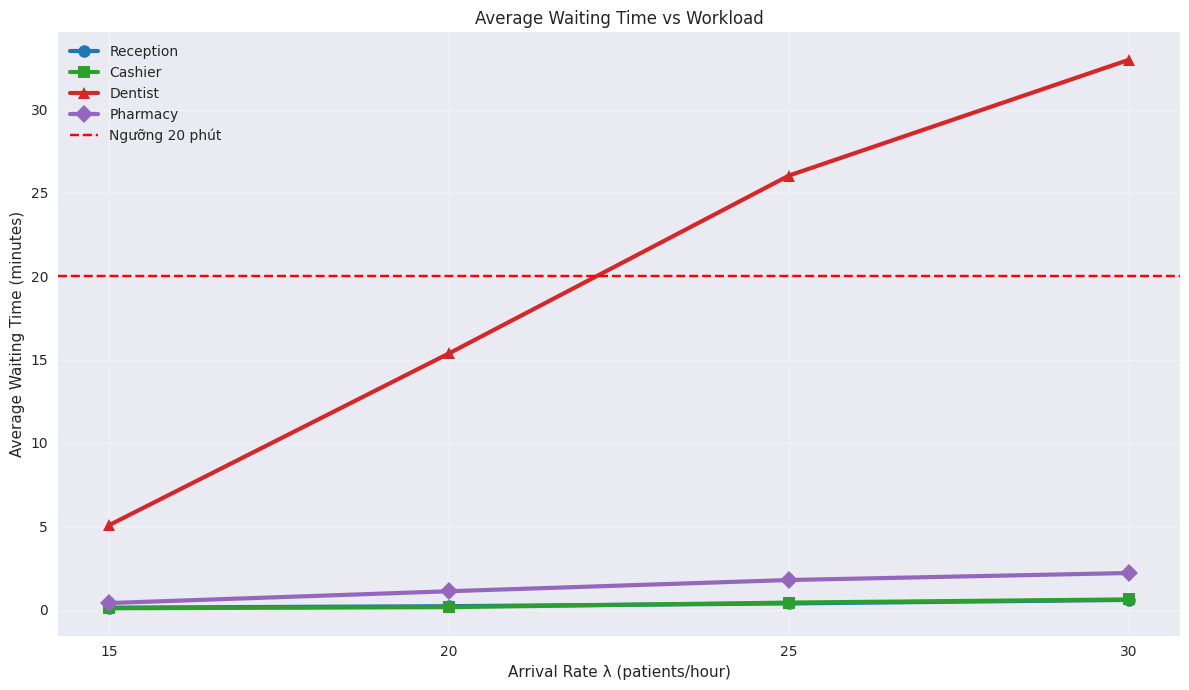

In [ ]:
plt.figure(figsize=(12,7))
for node, color, marker in zip(nodes_3,['#1f77b4','#2ca02c','#d62728','#9467bd'],['o','s','^','D']):
    waits = [results_3[l][node]['avg_wait'] for l in workloads_3]
    plt.plot(workloads_3, waits, marker=marker, color=color, linewidth=3, markersize=9, label=node.capitalize())
plt.axhline(20, color='red', linestyle='--', label='Ngưỡng 20 phút')
plt.xlabel('Arrival Rate λ (patients/hour)')
plt.ylabel('Average Waiting Time (minutes)')
plt.title('Average Waiting Time vs Workload')
plt.xticks(workloads_3)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('chart_3_1_wait_vs_workload.png', dpi=300)
print('Lưu: chart_3_1_wait_vs_workload.png')

- **Xu hướng chung**: Thời gian chờ tăng theo lưu lượng đến λ tại tất cả các trạm. Trạm Dentist tăng mạnh nhất do tốc độ phục vụ thấp (μ tổng = 20 bệnh nhân/giờ) và λ tiến sát hoặc vượt công suất.
- **Reception & Cashier**: Tăng gần tuyến tính nhưng luôn rất thấp (< 3–4 phút) nhờ ρ < 1 ở mọi mức tải và có nhiều server rảnh.
- **Pharmacy**: Wq thấp hơn Dentist do chỉ ~70% bệnh nhân được định tuyến tiếp (routing giảm tải hiệu dụng).
- **Điểm bẻ cong**: Tại λ = 25 → 30, Wq Dentist tăng chậm lại → dấu hiệu bão hòa + blocking xuất hiện, tải dư bị từ chối thay vì tích tụ trong hàng đợi.
- **Kết luận**: Dentist là nút cổ chai chính. Các giải pháp tối ưu cần tập trung tăng số server (c) hoặc giảm thời gian phục vụ trung bình tại trạm này.

### **4.2.3 Tỷ Lệ Từ Chối (Loss Rate) vs Workload**

Lưu: chart_3_2_loss_vs_workload.png


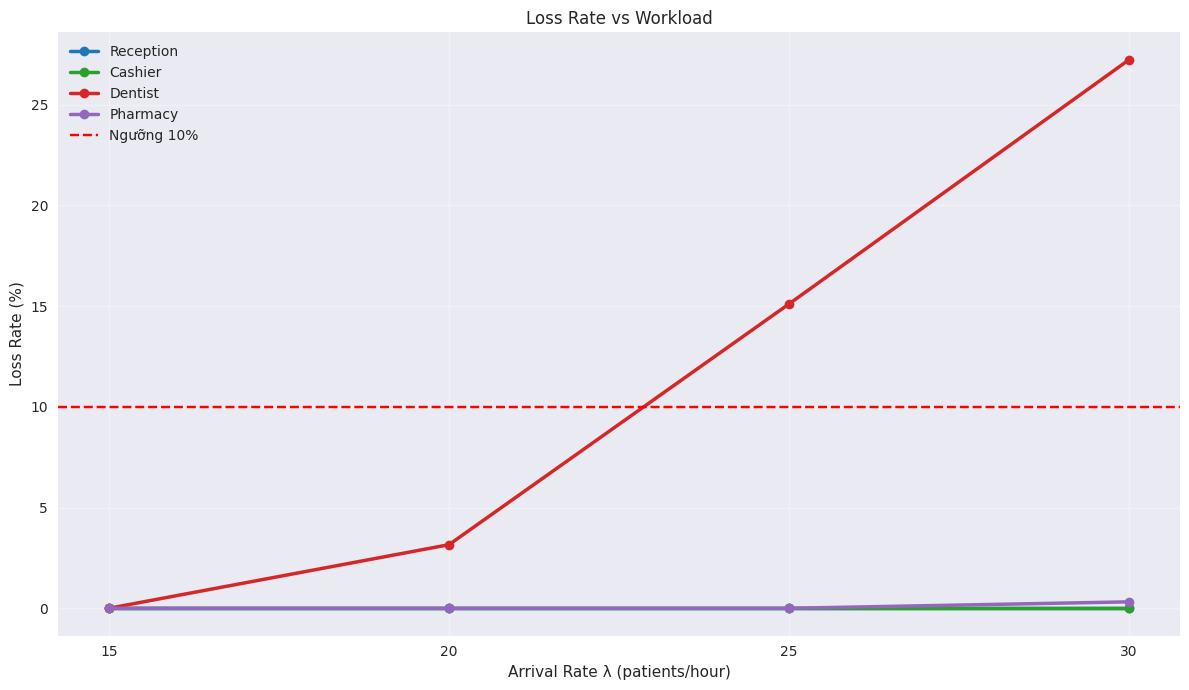

In [ ]:
plt.figure(figsize=(12,7))
for node, color in zip(nodes_3,['#1f77b4','#2ca02c','#d62728','#9467bd']):
    losses = [results_3[l][node]['loss_rate']*100 for l in workloads_3]
    plt.plot(workloads_3, losses, marker='o', linewidth=2.5, color=color, label=node.capitalize())
plt.axhline(10, color='red', linestyle='--', label='Ngưỡng 10%')
plt.xlabel('Arrival Rate λ (patients/hour)')
plt.ylabel('Loss Rate (%)')
plt.title('Loss Rate vs Workload')
plt.xticks(workloads_3)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('chart_3_2_loss_vs_workload.png', dpi=300)
print('Lưu: chart_3_2_loss_vs_workload.png')

- Loss rate ≈ 0 tại λ = 15 và 20 (hệ thống còn ổn định).
- Bắt đầu tăng đáng kể từ λ = 25 và tiếp tục tăng tại λ = 30 do hàng đợi đạt giới hạn K → bệnh nhân bị reject.
- Trạm có loss đáng kể chủ yếu là Dentist (c+K bị đầy); các trạm khác gần như không bị đầy nhờ tốc độ phục vụ cao hơn so với λ.
- **Ý nghĩa**: Đảm bảo chất lượng dịch vụ đòi hỏi giảm loss (mở rộng K hoặc tăng c) nếu λ dự kiến thường xuyên đạt 25+.
- **Nhận xét**: Loss rate tăng là tín hiệu suy giảm trải nghiệm; hệ thống đang chuyển từ ‘queue delay’ sang ‘capacity clipping’.

### **4.2.4 Thông Lượng (Throughput) vs Workload**


Chạy thêm mô phỏng cho λ = [35, 40] để phân tích throughput mở rộng...


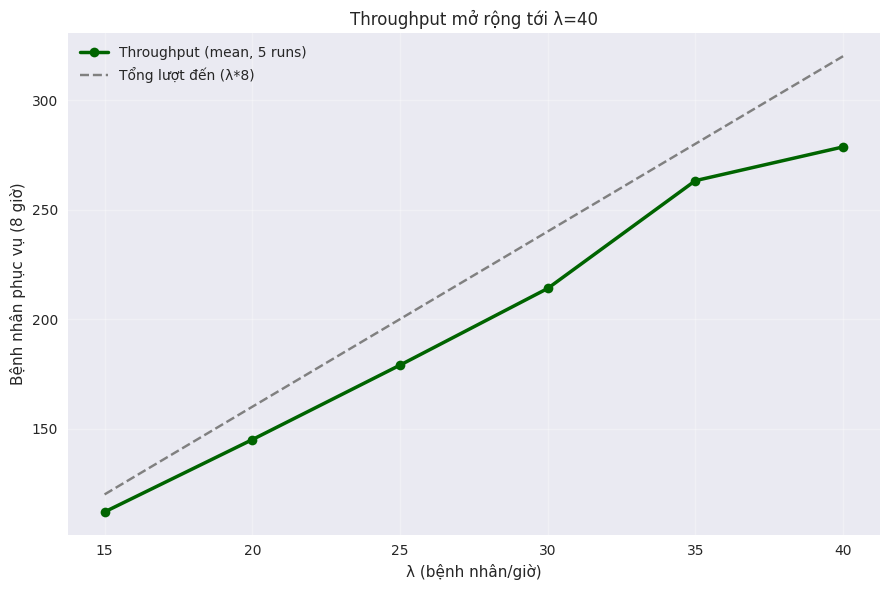

λ=15: served_total≈112.0 (≈14.00/h) | capture=93.3%
λ=20: served_total≈145.0 (≈18.12/h) | capture=90.6%
λ=25: served_total≈179.0 (≈22.38/h) | capture=89.5%
λ=30: served_total≈214.0 (≈26.75/h) | capture=89.2%
λ=35: served_total≈263.2 (≈32.90/h) | capture=94.0%
λ=40: served_total≈278.6 (≈34.83/h) | capture=87.1%


In [ ]:
# Sử dụng dữ liệu có sẵn từ main cho λ = 15,20,25,30
ext_workloads = list(workloads)  # Bắt đầu với dữ liệu đã có
throughput_ext = []

# Lấy dữ liệu throughput từ kết quả đã chạy
for lam in workloads:
    if 'system' in final_results[lam]:
        throughput_ext.append(final_results[lam]['system']['total_patients'])
    else:
        throughput_ext.append(0)

# Chỉ chạy thêm cho các mức tải mới (nếu muốn mở rộng)
extra_workloads = [35, 40]  # Các mức tải thêm để xem xu hướng
if extra_workloads:
    print(f"\nChạy thêm mô phỏng cho λ = {extra_workloads} để phân tích throughput mở rộng...")
    rep_runs = 5
    for lam in extra_workloads:
        totals = []
        for r in range(rep_runs):
            sys_ext = DentalClinicSystem(arrival_rate=lam, sim_hours=sim_hours)
            st = sys_ext.run()
            if 'system' in st:
                totals.append(st['system']['total_patients'])
        throughput_ext.append(np.mean(totals) if totals else 0)
        ext_workloads.append(lam)

plt.figure(figsize=(9,6))
plt.plot(ext_workloads, throughput_ext, marker='o', color='darkgreen', linewidth=2.5, label='Throughput (mean, 5 runs)')
nominal_arrivals = [lam*8 for lam in ext_workloads]
plt.plot(ext_workloads, nominal_arrivals, linestyle='--', color='gray', label='Tổng lượt đến (λ*8)')
plt.xlabel('λ (bệnh nhân/giờ)')
plt.ylabel('Bệnh nhân phục vụ (8 giờ)')
plt.title('Throughput mở rộng tới λ=40')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

for lam, thr, arr in zip(ext_workloads, throughput_ext, nominal_arrivals):
    rate_served = thr/8
    pct = 100*thr/arr if arr>0 else 0
    print(f"λ={lam}: served_total≈{thr:.1f} (≈{rate_served:.2f}/h) | capture={pct:.1f}%")

:- Đoạn 15→30 vẫn gần tuyến tính: chưa bão hòa.
- Thêm các điểm 35, 40 sẽ cho thấy liệu đường bắt đầu cong (chậm lại) hay vẫn tuyến tính.
- So sánh với đường λ*8 cho thấy tỷ lệ capture <100% ngay từ λ thấp do mất / giới hạn.
- Nếu tại 35, 40 tỷ lệ capture không giảm rõ rệt => còn dư năng lực; nếu giảm mạnh => tiến sát trần.
- **Đề xuất**: Quyết định mở rộng Dentist nên dựa vào điểm đầu tiên throughput cong và tỷ lệ capture tụt nhanh.

### **4.2.5 So Sánh Lý Thuyết M/M/c vs Mô Phỏng M/M/c/K (Dentist)**

Lưu: chart_3_4_theory_vs_sim.png


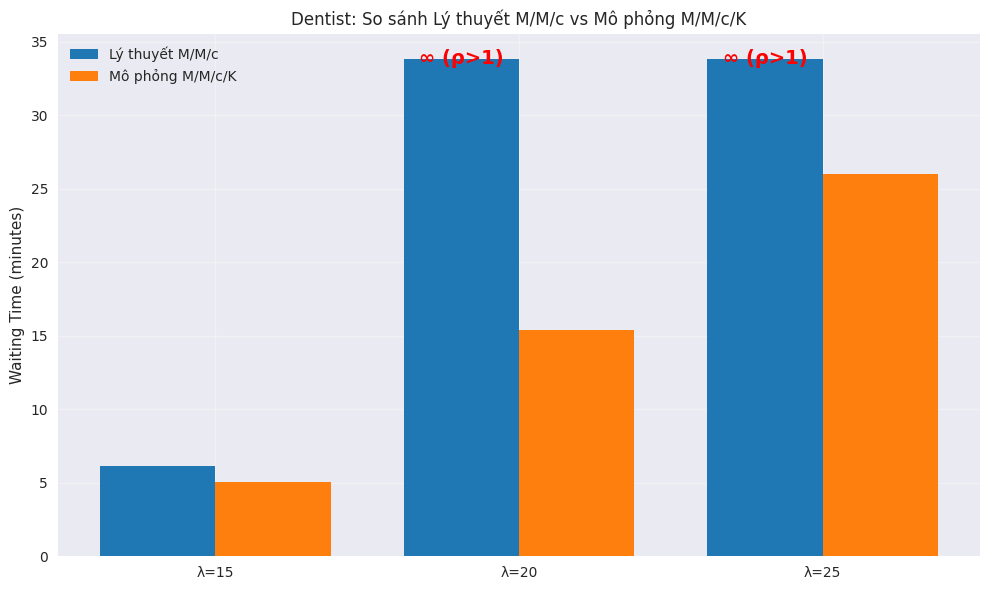

In [ ]:
def erlang_c_Wq_minutes(lam, mu, c):
    lam_p = lam/60.0; mu_p = mu/60.0
    rho = lam_p/(c*mu_p)
    if rho >= 1: return np.inf
    a = lam_p/mu_p
    sum_terms = sum(a**k/ math.factorial(k) for k in range(c))
    P0 = 1 / (sum_terms + a**c/(math.factorial(c)*(1-rho)))
    ErlangC = a**c / math.factorial(c) * P0 * 1/(1-rho)
    Wq_hours = ErlangC / (c*mu_p - lam_p)
    return Wq_hours

compare_lams = [15,20,25]
th_vals = [erlang_c_Wq_minutes(l,5,4) for l in compare_lams]
sim_vals = [results_3[l]['dentist']['avg_wait'] for l in compare_lams]
labels = [f'λ={l}' for l in compare_lams]

# Tìm giá trị max để đặt mức tượng trưng cho ∞
max_finite = max([v for v in th_vals if not np.isinf(v)] + sim_vals)
inf_symbolic = max_finite * 1.3  # Đặt cột ∞ cao hơn 30% so với max

x = np.arange(len(labels)); width=0.38
plt.figure(figsize=(10,6))

# Vẽ cột lý thuyết: nếu ∞ thì dùng giá trị tượng trưng
th_display = [inf_symbolic if np.isinf(v) else v for v in th_vals]
plt.bar(x-width/2, th_display, width, label='Lý thuyết M/M/c', color='#1f77b4')
plt.bar(x+width/2, sim_vals, width, label='Mô phỏng M/M/c/K', color='#ff7f0e')
plt.xticks(x, labels)
plt.ylabel('Waiting Time (minutes)')
plt.title('Dentist: So sánh Lý thuyết M/M/c vs Mô phỏng M/M/c/K')

# Thêm annotation ∞ cho các cột lý thuyết vô cực
for i,v in enumerate(th_vals):
    if np.isinf(v):
        plt.text(x[i]-width/2, th_display[i], '∞ (ρ>1)', color='red', ha='center', va='center', fontsize=14, fontweight='bold')

plt.legend(); plt.grid(alpha=0.3); plt.tight_layout()
plt.savefig('chart_3_4_theory_vs_sim.png', dpi=300)
print('Lưu: chart_3_4_theory_vs_sim.png')

- Ở λ=15: chênh lệch vừa phải; mô phỏng cho Wq thấp hơn lý thuyết vì queue hữu hạn (một phần bị chặn sớm) và dao động ngẫu nhiên.
- Ở λ=20 và λ=25: Lý thuyết M/M/c cho ∞ (ρ>1) trong mô hình vô hạn; mô phỏng vẫn hữu hạn nhờ giới hạn K → minh họa vai trò “buffer cap” trong thực tế.
- **Kết luận**: Công thức Erlang-C (M/M/c vô hạn) chỉ hợp lệ khi ρ < 1. Ở vùng quá tải cần sử dụng mô hình M/M/c/K hoặc mô phỏng để đánh giá chính xác.
> Mô phỏng cung cấp thời gian chờ hữu hạn tại λ=25 do blocking giảm λ hiệu dụng; lý thuyết M/M/c vô hạn không còn áp dụng.

### **4.2.6 Histogram Phân Bố Thời Gian Chờ Dentist**

Lưu: chart_3_5_hist_lambda_20.png
Lưu: chart_3_5_hist_lambda_25.png


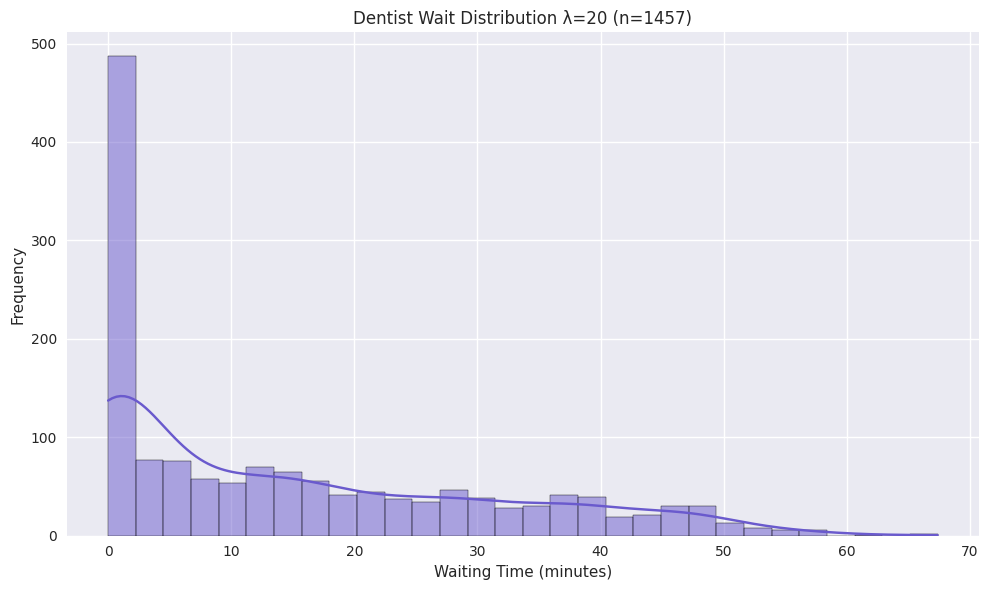

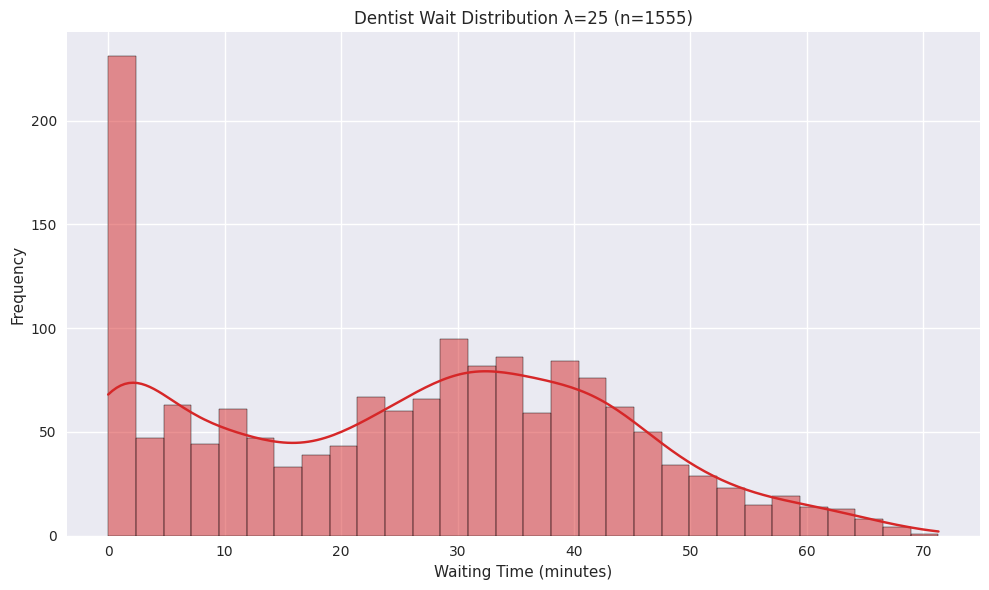

In [ ]:
# Sử dụng dữ liệu raw_dentist_waits từ main
for lam_hist,color in [(20,'#6a5acd'),(25,'#d62728')]:
    waits = raw_dentist_waits.get(lam_hist, [])
    if waits:
        plt.figure(figsize=(10,6))
        sns.histplot(waits, bins=30, kde=True, color=color)
        plt.xlabel('Waiting Time (minutes)')
        plt.ylabel('Frequency')
        plt.title(f'Dentist Wait Distribution λ={lam_hist} (n={len(waits)})')
        plt.tight_layout()
        fname = f'chart_3_5_hist_lambda_{lam_hist}.png'
        plt.savefig(fname, dpi=300)
        print('Lưu:', fname)
    else:
        print('Không có dữ liệu cho λ=', lam_hist)

- λ = 20 (ổn định): Phân bố lệch phải nhẹ, đa số bệnh nhân chờ ngắn → ρ ở mức chấp nhận được.
- λ = 25 (quá tải nhẹ): Đuôi phân bố kéo dài hơn, xuất hiện nhiều giá trị chờ cao → tích lũy hàng đợi.
- Không có đuôi cực dài nhờ giới hạn K (cắt bỏ các trường hợp chờ rất lâu).
- Hình dạng gần với phân bố mũ (exponential-like), phù hợp với giả định arrival Poisson + service exponential.
> Khi tiến vào vùng quá tải, phân bố dịch chuyển sang phải và variance tăng, phản ánh sự suy giảm QoS trước khi blocking chi phối hoàn toàn.

### **4.2.7 Heatmap Tối Ưu Số Ghế Dentist**

### ⚠️ **Lưu ý**:
Biểu đồ này cần chạy mô phỏng riêng với các cấu hình khác nhau của `c` (số ghế Dentist = 3, 4, 5, 6) nên không thể tái sử dụng dữ liệu từ main. Đây là phân tích tối ưu hóa tham số nhằm hỗ trợ đánh giá sau này.



Chạy phân tích tối ưu hóa: 4 cấu hình × 4 workloads × 15 runs...
  ├─ Testing c=3 dentist chairs... (1/4)
      λ=15: Wq=19.0±8.8 min
      λ=20: Wq=37.5±8.7 min
      λ=25: Wq=45.9±6.1 min
      λ=30: Wq=47.2±5.0 min
  ├─ Testing c=4 dentist chairs... (2/4)
      λ=15: Wq=5.3±4.1 min
      λ=20: Wq=14.7±7.7 min
      λ=25: Wq=26.5±7.4 min
      λ=30: Wq=33.7±4.4 min
  ├─ Testing c=5 dentist chairs... (3/4)
      λ=15: Wq=0.8±0.4 min
      λ=20: Wq=6.6±4.5 min
      λ=25: Wq=14.4±6.8 min
      λ=30: Wq=19.8±5.5 min
  ├─ Testing c=6 dentist chairs... (4/4)
      λ=15: Wq=0.2±0.3 min
      λ=20: Wq=1.3±0.7 min
      λ=25: Wq=5.1±3.6 min
      λ=30: Wq=9.1±4.6 min
Lưu: chart_3_6_dentist_heatmap.png


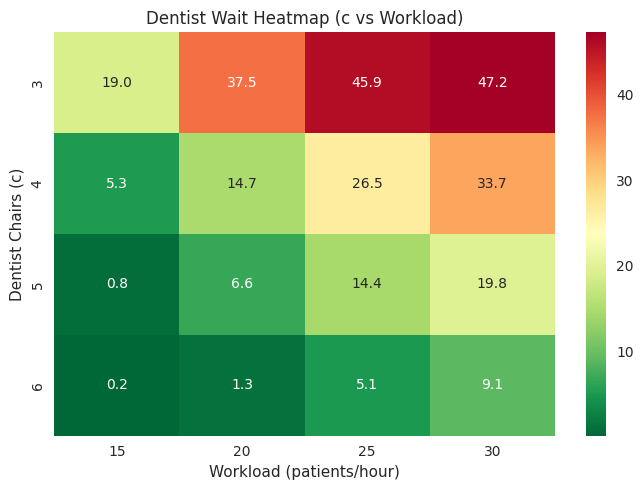

In [ ]:
c_vals = [3, 4, 5, 6]  # Các giá trị c để so sánh
heat_rows = []
rep_small = 15  # TĂNG LÊN 15 runs để kết quả ổn định hơn (trước: 5)
                # Với hệ thống quá tải (c=3), cần nhiều runs để trung bình hợp lý

print(f"\nChạy phân tích tối ưu hóa: {len(c_vals)} cấu hình × {len(workloads_3)} workloads × {rep_small} runs...")

for idx_c, c in enumerate(c_vals):
    print(f"  ├─ Testing c={c} dentist chairs... ({idx_c+1}/{len(c_vals)})")
    for lam in workloads_3:
        w_tmp = []
        for r in range(rep_small):
            cfg = {
                'reception': {'c': 2, 'mu': 30/60, 'K': 10},
                'cashier':   {'c': 2, 'mu': 30/60, 'K': 10},
                'dentist':   {'c': c, 'mu': 5/60,  'K': 15},  # Thay đổi c
                'pharmacy':  {'c': 2, 'mu': 15/60, 'K': 8}
            }
            sys_obj = DentalClinicSystem(arrival_rate=lam, sim_hours=sim_hours, config=cfg)
            st = sys_obj.run()
            w_tmp.append(st['dentist']['avg_wait'])

        avg_wait = np.mean(w_tmp)
        std_wait = np.std(w_tmp)
        heat_rows.append({'c_dentist': c, 'workload': lam, 'avg_wait': avg_wait})
        print(f"      λ={lam}: Wq={avg_wait:.1f}±{std_wait:.1f} min")
heat_df = pd.DataFrame(heat_rows)
heatmat = heat_df.pivot(index='c_dentist', columns='workload', values='avg_wait')
plt.figure(figsize=(7,5))
sns.heatmap(heatmat, annot=True, fmt='.1f', cmap='RdYlGn_r')
plt.title('Dentist Wait Heatmap (c vs Workload)')
plt.xlabel('Workload (patients/hour)')
plt.ylabel('Dentist Chairs (c)')
plt.tight_layout()
plt.savefig('chart_3_6_dentist_heatmap.png', dpi=300)
print('Lưu: chart_3_6_dentist_heatmap.png')

- Với cùng workload, tăng c làm giảm Wq rất rõ rệt (hiệu quả cao nhất từ c = 3 → 5; hiệu quả biên giảm dần sau c = 5).
- λ = 25–30: c = 5 thường đưa Wq xuống dưới 20 phút (mục tiêu SLA); c = 6 chỉ cải thiện thêm marginal.
- λ = 15–20: Sử dụng c quá lớn gây dư thừa tài nguyên (utilization thấp) → không kinh tế.
- **Khuyến nghị`**:
  - c = 4 khi λ ≤ 20 bệnh nhân/giờ
  - c = 5 khi λ ≈ 25–30 bệnh nhân/giờ (đạt SLA chờ ≤ 20 phút với chi phí hợp lý)
- **Đề xuất nâng cao**: Áp dụng dynamic scaling (mở thêm ghế thứ 5 hoặc 6 chỉ trong khung giờ cao điểm).

#### **Tóm tắt chiến lược tối ưu**

- **Nút cổ chai chính**: Trạm Dentist (thời gian phục vụ dài + λ tiến sát công suất).
- **Biện pháp ưu tiên**:
  1. Tăng số ghế nha sĩ (c = 5 ở giờ cao điểm, c = 4 giờ thường).
  2. Rút ngắn thời gian phục vụ trung bình (phân loại ca bệnh, chuẩn hóa quy trình).
- Blocking hiện tại giúp ngăn Wq bùng nổ nhưng gây loss → cần mở rộng capacity trước khi tỷ lệ từ chối vượt ngưỡng chấp nhận được.
> **Khuyến nghị cuối cùng**: “Đề xuất triển khai cấu hình linh hoạt c = 4–5 ghế nha sĩ (tùy theo lưu lượng thực tế) nhằm tối ưu đồng thời chi phí vận hành và trải nghiệm bệnh nhân (Wq ≤ 20 phút, loss rate < 5%).”

# **5. Kết luận**

### 5.1. Tóm tắt kết quả chính
Mô phỏng hệ thống phòng khám nha khoa với kiến trúc hàng đợi nhiều trạm đã làm rõ nút cổ chai tại trạm Dentist: thời gian chờ tăng nhanh khi tải (λ) tiến sát năng lực phục vụ, và cơ chế blocking (K) làm giới hạn hàng đợi giúp thời gian chờ không bùng nổ nhưng đổi lại xuất hiện loss rate. Các phân tích đa workload (λ = 15, 20, 25, 30), lặp Monte‑Carlo nhiều lần, biểu đồ so sánh lý thuyết M/M/c với mô phỏng M/M/c/K, histogram phân bố chờ, và heatmap tối ưu hóa số ghế (c) đã cung cấp nền tảng định lượng để đề xuất cấu hình linh hoạt 4–5 ghế nha sĩ nhằm đạt SLA Wq ≤ 20 phút và giảm loss < 5%.

### 5.2. Điểm mạnh của giai đoạn hiện tại
- Kiến trúc mô hình rõ ràng: tách Queue / Node / NodeManager / Statistics → dễ bảo trì & mở rộng.
- Tái sử dụng dữ liệu hiệu quả: một vòng mô phỏng cấp đủ dữ liệu cho nhiều loại biểu đồ mà không cần chạy lại dư thừa.
- Đa replication và đa workload: giảm nhiễu ngẫu nhiên, tạo cơ sở so sánh xu hướng tải.
- Phân tích đối chiếu lý thuyết vs mô phỏng: minh họa giới hạn áp dụng Erlang-C khi ρ > 1.
- Heatmap thông số năng lực (c): hỗ trợ quyết định mở rộng dựa trên lợi ích biên.

### 5.3. Hạn chế (2–3 trọng yếu)
1. Giả định workload “phẳng” (một λ trung bình cho toàn bộ 8 giờ) → không phản ánh biến thiên intra-day (giờ cao điểm và giờ vắng). Đây là hạn chế quan trọng nhấ`t cần khắc phục.
2. Routing tĩnh và không phụ thuộc thời điểm: chưa mô phỏng khả năng thay đổi luồng (ví dụ Pharmacy quá tải làm nha sĩ tư vấn lâu hơn hoặc tạo nhánh đi khác).
3. Chưa phân loại bệnh nhân theo nhóm dịch vụ/độ phức tạp (service time hiện dùng một phân phối exponential đơn giản) → giảm độ chính xác khi cần mô tả thực tế đa dạng.

### 5.4. Hướng cải tiến cho Nhóm 3 – Mô phỏng theo lát thời gian 2 giờ
Mục tiêu kế tiếp: chuyển từ mô hình “một λ cố định” sang “λ biến thiên theo lát thời gian”, chia ca làm việc 8 giờ thành 4 khoảng: [0–120], [120–240], [240–360], [360–480] phút.

Đề xuất kỹ thuật:
- Thu thập hoặc ước lượng vector λ = [λ₁, λ₂, λ₃, λ₄] (bệnh nhân/giờ) phản ánh thực tế (ví dụ: cao điểm sáng, giảm giữa ca, tăng cuối ca).
- Thay đổi hàm `patient_generator`: dùng Piecewise Poisson Process; tại mỗi thời điểm kiểm tra `env.now` để lấy λ hiện hành (convert sang λ/phút). Inter-arrival time: Exp(λ_segment/60).
- Ghi nhận thống kê theo lát: mở rộng `Statistics` thêm cấu trúc lưu `wait_times_slice`, `loss_rate_slice`, `throughput_slice` để đánh giá SLA theo từng 2 giờ (phát hiện sớm vi phạm cục bộ).
- Cho phép cấu hình năng lực động: vector c_dentist = [c₁, c₂, c₃, c₄]; triển khai cơ chế điều chỉnh capacity tại mốc thời gian (event kích hoạt khi `env.now` đạt ranh giới lát).
- Xuất bảng so sánh: SLA đạt/không theo lát (Wq, loss), tổng thời gian hệ thống, đề xuất lịch mở thêm ghế.

Pseudo-code khung mở rộng arrival:
```python
segments = [(0,120, lam1/60), (120,240, lam2/60), (240,360, lam3/60), (360,480, lam4/60)]
while env.now < sim_time:
    current_rate = next(rate for (s,e,rate) in segments if s <= env.now < e)
    ia_time = random.expovariate(current_rate)
    yield env.timeout(ia_time)
    ... tạo bệnh nhân ...
```

### 5.5. Lý do và lợi ích của tiếp cận theo lát
- Phản ánh thực tế biến động nhu cầu → tránh “ảo tưởng ổn định” do trung bình che khuất cực trị.
- Định lượng chính xác thời điểm vi phạm SLA → ưu tiên điều chỉnh nguồn lực theo giờ.
- Hỗ trợ phân tích chi phí: mở rộng năng lực chỉ ở lát cao điểm thay vì cả ca → tối ưu chi phí vận hành.
- Cải thiện ra quyết định chiến lược: xác định xem tăng μ (quy trình) hay tăng c (nhân sự) có hiệu quả hơn ở từng lát.

### 5.6. Khuyến nghị hành động ngay
1. Thu thập dữ liệu lịch sử hoặc giả lập sơ bộ λ theo từng 2 giờ.
2. Cập nhật lớp `DentalClinicSystem` để nhận vector λ và (tùy chọn) vector c.
3. Mở rộng `Statistics` cho lưu trữ và báo cáo theo lát.
4. Chạy thử kịch bản với một bộ λ “cao điểm–thấp điểm” (ví dụ: [32, 24, 20, 28]) và so sánh với mô hình trung bình hiện tại.
5. Đưa ra đề xuất lịch mở thêm ghế (ví dụ: ghế thứ 5 chỉ bật ở lát 1 và lát 4).

### 5.7. Kết luận cuối cùng
Mô hình hiện tại đã hoàn thành tốt vai trò nền tảng và định vị rõ nút cổ chai Dentist. Tuy nhiên, để nâng độ tin cậy và tính thực tiễn của phân tích, bước chuyển sang mô phỏng workload phân đoạn 2 giờ là cần thiết và cấp bách. Triển khai cải tiến này sẽ giúp nhóm ra quyết định tối ưu nguồn lực theo thời điểm, giảm chi phí dư thừa, đồng thời duy trì SLA nhất quán trong suốt ca làm việc.

> Đề xuất chính thức: Nhóm 3 tiến hành phiên bản mô phỏng “piecewise workload” (4 lát 2 giờ) trong vòng lặp kế tiếp, kèm cơ chế thống kê và tối ưu năng lực động để chuẩn hóa khuyến nghị vận hành.
